In [1]:
#to remove warnings
import warnings
warnings.filterwarnings('ignore')

# **Importing libraries**

In [2]:
#importing all the important libraries
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,confusion_matrix


In [3]:
bankd = pd.read_csv('C:/Users/B.K Goel/Downloads/bank/data_bank.csv',sep=';')

In [4]:
#searching for missing variables
null_count = bankd.isnull().sum()
null_count   # this shows that there are no missing variables inside our dataset

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
bankd.shape

(41188, 21)

In [6]:
#columns headings to a different lists acc to their datatypes
num_cols = []
cat_col = []

for cols in bankd.columns:
    if bankd[cols].dtype == object:
        cat_col.append(cols)
    else:
        num_cols.append(cols)

In [7]:
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [8]:
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [9]:
bankd['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

# **Handling the categorical variables**

In [10]:
bankd["marital"]= bankd["marital"].replace("unknown", "married")

In [11]:
bankd["education"]= bankd["education"].replace("unknown", "university.degree")

In [12]:
bankd["default"]= bankd["default"].replace("unknown", "no")

In [13]:
bankd["housing"]= bankd["housing"].replace("unknown", "yes")

In [14]:
bankd["loan"]= bankd["loan"].replace("unknown", "no")

In [15]:
bankd.head()

age        job  marital    education default housing loan    contact month  \
0   56  housemaid  married     basic.4y      no      no   no  telephone   may   
1   57   services  married  high.school      no      no   no  telephone   may   
2   37   services  married  high.school      no     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no      no   no  telephone   may   
4   56   services  married  high.school      no      no  yes  telephone   may   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...         1    999         0  nonexistent          1.1   
1         mon  ...         1    999         0  nonexistent          1.1   
2         mon  ...         1    999         0  nonexistent          1.1   
3         mon  ...         1    999         0  nonexistent          1.1   
4         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [16]:
for cols in bankd.columns:
     if bankd[cols].dtypes == 'object':
        unique_cat = len(bankd[cols].unique())
        print("Feature '{cols}' has {unique_cat}' unqiue categories".format(
             cols = cols,unique_cat = unique_cat))

Feature 'job' has 12' unqiue categories
Feature 'marital' has 3' unqiue categories
Feature 'education' has 7' unqiue categories
Feature 'default' has 2' unqiue categories
Feature 'housing' has 2' unqiue categories
Feature 'loan' has 2' unqiue categories
Feature 'contact' has 2' unqiue categories
Feature 'month' has 10' unqiue categories
Feature 'day_of_week' has 5' unqiue categories
Feature 'poutcome' has 3' unqiue categories
Feature 'y' has 2' unqiue categories


In [17]:
for cols in bankd.columns:
     if bankd[cols].dtypes == float:
        unique_cat = len(bankd[cols].unique())
        print("Feature '{cols}' has {unique_cat}' unqiue categories".format(
             cols = cols,unique_cat = unique_cat))

Feature 'emp.var.rate' has 10' unqiue categories
Feature 'cons.price.idx' has 26' unqiue categories
Feature 'cons.conf.idx' has 26' unqiue categories
Feature 'euribor3m' has 316' unqiue categories
Feature 'nr.employed' has 11' unqiue categories


In [18]:
bankd['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [19]:
bankd['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [20]:
bankd['job'] = bankd['job'].replace(['management', 'admin.'], 'white-collar')
bankd['job'] = bankd['job'].replace(['services','housemaid'], 'pink-collar')
bankd['job'] = bankd['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [21]:
bankd['job'].value_counts()

white-collar     13346
blue-collar       9254
technician        6743
pink-collar       5029
other             3939
entrepreneur      1456
self-employed     1421
Name: job, dtype: int64

In [22]:
bankd['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [23]:
fdata=bankd

In [24]:
yn_mapping={'yes':1,'no':0}                       # convert string to numeric
fdata['default']=fdata['default'].map(yn_mapping)
fdata['housing']=fdata['housing'].map(yn_mapping)
fdata['loan']=fdata['loan'].map(yn_mapping)
fdata['y']=fdata['y'].map(yn_mapping)

In [25]:
fdata.head()
fdata.shape

(41188, 21)

# **Handling the categorical variables**

In [26]:
fdata.drop(['contact'], axis=1, inplace=True)

In [27]:
fdata.drop(['month','day_of_week'],axis=1,inplace=True)

In [28]:
fdata.drop(['pdays'], axis=1, inplace=True)

# **Dummy variables**

In [29]:
data = pd.get_dummies(fdata)

In [30]:
data.head()

age  default  housing  loan  duration  campaign  previous  emp.var.rate  \
0   56        0        0     0       261         1         0           1.1   
1   57        0        0     0       149         1         0           1.1   
2   37        0        1     0       226         1         0           1.1   
3   40        0        0     0       151         1         0           1.1   
4   56        0        0     1       307         1         0           1.1   

   cons.price.idx  cons.conf.idx  ...  education_basic.4y  education_basic.6y  \
0          93.994          -36.4  ...                   1                   0   
1          93.994          -36.4  ...                   0                   0   
2          93.994          -36.4  ...                   0                   0   
3          93.994          -36.4  ...                   0                   1   
4          93.994          -36.4  ...                   0                   0   

   education_basic.9y  education_high.school  education_illiterate  \
0                   0                      0                     0   
1                   0                      1                     0   
2                   0                      1                     0   
3                   0                      0                     0   
4                   0                      1                     0   

   education_professional.course  education_university.degree  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   poutcome_failure  poutcome_nonexistent  poutcome_success  
0                 0                     1                 0  
1                 0                     1                 0  
2                 0                     1                 0  
3                 0                     1                 0  
4                 0                     1                 0  

[5 rows x 33 columns]

# **Visualising the preprocessed datset**

In [31]:
data.corr()

age   default   housing      loan  \
age                            1.000000  0.001891 -0.001755 -0.007198   
default                        0.001891  1.000000 -0.003679 -0.003609   
housing                       -0.001755 -0.003679  1.000000  0.036425   
loan                          -0.007198 -0.003609  0.036425  1.000000   
duration                      -0.000866 -0.005101 -0.008334  0.000121   
campaign                       0.004594 -0.003803 -0.010959  0.005294   
previous                       0.024365  0.002766  0.021677 -0.002143   
emp.var.rate                  -0.000371  0.004445 -0.059100  0.001193   
cons.price.idx                 0.000857 -0.003141 -0.077170 -0.005944   
cons.conf.idx                  0.129372  0.004492 -0.032388 -0.013673   
euribor3m                      0.010767  0.005274 -0.058233 -0.000487   
nr.employed                   -0.017725  0.005941 -0.045590  0.004205   
y                              0.030399 -0.003041  0.011085 -0.004466   
job_blue-collar               -0.024191 -0.004594 -0.014033 -0.006127   
job_entrepreneur               0.031213 -0.001634  0.004567 -0.005449   
job_other                      0.214023  0.006898  0.005459 -0.002192   
job_pink-collar               -0.017939 -0.003183 -0.005256 -0.001627   
job_self-employed             -0.001356 -0.001613  0.000392 -0.007624   
job_technician                -0.064383  0.011601  0.009052 -0.006197   
job_white-collar              -0.061251 -0.005909  0.003650  0.018002   
marital_divorced               0.166125 -0.003031 -0.001054 -0.005283   
marital_married                0.271596  0.006865 -0.012619 -0.001189   
marital_single                -0.411703 -0.005334  0.014452  0.004999   
education_basic.4y             0.244079 -0.002867 -0.010818 -0.002125   
education_basic.6y             0.009897 -0.002072 -0.007179 -0.005221   
education_basic.9y            -0.038320 -0.003540 -0.001368 -0.006502   
education_high.school         -0.106550  0.002072 -0.007067 -0.000060   
education_illiterate           0.017007 -0.000178  0.000323  0.000873   
education_professional.course  0.002054  0.013812  0.013242 -0.000474   
education_university.degree   -0.039154 -0.006091  0.008361  0.009103   
poutcome_failure              -0.002537  0.006454  0.021712 -0.000001   
poutcome_nonexistent          -0.016376 -0.004890 -0.025171  0.000253   
poutcome_success               0.035626 -0.001585  0.011349 -0.000481   

                               duration      campaign  previous  emp.var.rate  \
age                           -0.000866  4.593580e-03  0.024365     -0.000371   
default                       -0.005101 -3.802952e-03  0.002766      0.004445   
housing                       -0.008334 -1.095916e-02  0.021677     -0.059100   
loan                           0.000121  5.294371e-03 -0.002143      0.001193   
duration                       1.000000 -7.169923e-02  0.020640     -0.027968   
campaign                      -0.071699  1.000000e+00 -0.079141      0.150754   
previous                       0.020640 -7.914147e-02  1.000000     -0.420489   
emp.var.rate                  -0.027968  1.507538e-01 -0.420489      1.000000   
cons.price.idx                 0.005312  1.278359e-01 -0.203130      0.775334   
cons.conf.idx                 -0.008173 -1.373310e-02 -0.050936      0.196041   
euribor3m                     -0.032897  1.351325e-01 -0.454494      0.972245   
nr.employed                   -0.044703  1.440949e-01 -0.501333      0.906970   
y                              0.405274 -6.635741e-02  0.230181     -0.298334   
job_blue-collar                0.012992 -1.774573e-03 -0.054845      0.057264   
job_entrepreneur               0.003679 -2.203068e-03 -0.013239      0.009363   
job_other                      0.010718 -1.605676e-02  0.099038     -0.144563   
job_pink-collar               -0.002246  4.191825e-03 -0.016308      0.035102   
job_self-employed              0.004270  6.360926e-03 -0.011231      0.001477   
job_technician

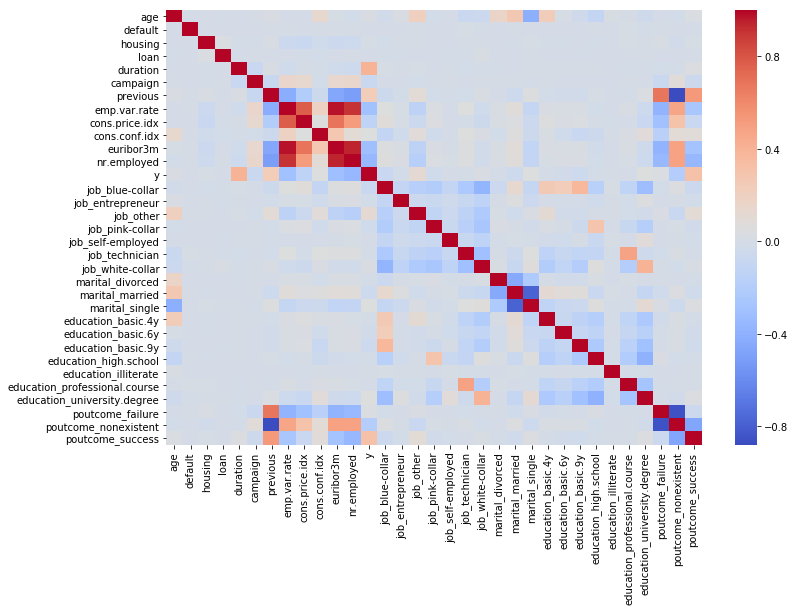

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap='coolwarm')

# **Splitting the dataset into training and tetsing set**

In [33]:
Y=data['y']
X=data.drop(['y'],axis=1)

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

# **Decision tree classifiers**


**gini index creation**

In [35]:
dtree_gini = DecisionTreeClassifier(criterion='gini',max_depth=3)


In [36]:
dtree_gini.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
dtree_gini.score(X_test,y_test)

0.9064497855466537

In [38]:
#In order to tune the max-depth of out model, we will test the model for different values of max_depth
scores = []
for i in range(3,13):
    dtree_test = DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree_test.fit(X_train,y_train)
    scores.append(dtree_test.score(X_test,y_test))
print(scores)

[0.9064497855466537, 0.9110625556364813, 0.9127619972485231, 0.9131666262037711, 0.9096058913975884, 0.9100105203528365, 0.908877559278142, 0.9066116371287529, 0.902889050740471, 0.9007849801731812]


In [39]:
dtree_gini = DecisionTreeClassifier(criterion='gini',max_depth=8)
dtree_gini.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
predictions_gini = dtree_gini.predict(X_test)

In [41]:
print("Confusion Matrix for Decision Tree with Gini-Index criterion:\n",confusion_matrix(y_test,predictions_gini))
print("\n\nClassification Report:\n",classification_report(y_test,predictions_gini))

Confusion Matrix for Decision Tree with Gini-Index criterion:
 [[10482   496]
 [  615   764]]


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     10978
           1       0.61      0.55      0.58      1379

    accuracy                           0.91     12357
   macro avg       0.78      0.75      0.76     12357
weighted avg       0.91      0.91      0.91     12357



In [42]:
print("Training Score: ",dtree_gini.score(X_train,y_train))
print("Test Score: ",dtree_gini.score(X_test,y_test))

Training Score:  0.9302833755332801
Test Score:  0.910091446143886


In [43]:
accuracy_gini = dtree_gini.score(X_test,y_test)

**information gain**

In [44]:
#We again loop over different values to find optimal max-depth
scores = []
for i in range(3,13):
    dtree_test = DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dtree_test.fit(X_train,y_train)
    scores.append(dtree_test.score(X_test,y_test))
print(scores)

[0.9004612770089827, 0.9117908877559278, 0.9136521809500688, 0.9127619972485231, 0.9135712551590192, 0.9112244072185806, 0.9102532977259853, 0.9095249656065388, 0.9091203366512908, 0.9056405276361577]


In [45]:
dtree_ig = DecisionTreeClassifier(criterion='entropy',max_depth=8)
dtree_ig.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
predictions_ig = dtree_ig.predict(X_test)

In [47]:
print("Confusion Matrix for Decision Tree with Gini-Index criterion:\n",confusion_matrix(y_test,predictions_ig))
print("\n\nClassification Report:\n",classification_report(y_test,predictions_ig))

Confusion Matrix for Decision Tree with Gini-Index criterion:
 [[10498   480]
 [  619   760]]


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     10978
           1       0.61      0.55      0.58      1379

    accuracy                           0.91     12357
   macro avg       0.78      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357



In [48]:
print("Training Score: ",dtree_ig.score(X_train,y_train))
print("Test Score: ",dtree_ig.score(X_test,y_test))

Training Score:  0.9263639832125143
Test Score:  0.9110625556364813


In [49]:
accuracy_ig = dtree_ig.score(X_test,y_test)

In [50]:
plt.figure(figsize=(500,40))
gini_tree = plot_tree(dtree_gini,feature_names=X.columns,class_names=["Yes","No"],filled=True,rounded=True,fontsize=14)
#Double click on the image to zoom it

In [51]:
plt.figure(figsize=(500,40))
ig_tree = plot_tree(dtree_ig,feature_names=X.columns,class_names=["Yes","No"],filled=True,rounded=True,fontsize=14)
#Double click on the image to zoom it